In [104]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 
import functions.plotting as plot 
import functions.data_wrangling as data 
import functions.aos_functions as aos

import matplotlib.patches as patches

In [105]:
# ds1 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/era_int_TEM_ubar_div1.nc',
#                         parallel=True, chunks={'time':31})
# ds2 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
#                         parallel=True, chunks={'time':31})
# ds3 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/ncep_ncar_TEM_ubar_div1.nc',
#                         parallel=True, chunks={'time':31})

# ds1 = ds1.where(ds1.pressure < 1000., drop=True)
# ds2 = ds2.where(ds2.pressure < 1000., drop=True)
# ds3 = ds3.where(ds3.pressure < 1000., drop=True)

# ds1 = data.seasonal_mean(ds1)
# ds2 = data.seasonal_mean(ds2)
# ds3 = data.seasonal_mean(ds3) 

# ds1 

In [106]:
ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})

ds = ds.sel(time=slice('1979', '2016'))

ds_NH = data.seasonal_mean(ds, season='djf')
ds_SH = data.seasonal_mean(ds, season='jja')

ds_NH 

<xarray.Dataset>
Dimensions:   (time: 37, pressure: 22, latitude: 73)
Coordinates:
  * pressure  (pressure) float32 1e+03 925.0 850.0 700.0 ... 5.0 3.0 2.0 1.0
  * latitude  (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
  * time      (time) datetime64[ns] 1979-12-01 1980-12-01 ... 2015-12-01
Data variables:
    ubar      (time, pressure, latitude) float32 -1.421e-06 ... -5.338e-05
    div1_pr   (time, pressure, latitude) float32 nan nan nan nan ... nan nan nan
    div1_qg   (time, pressure, latitude) float32 nan nan -2.008e-05 ... nan nan

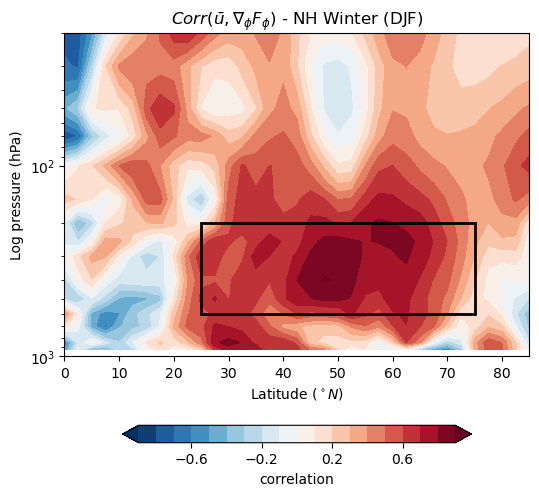

In [107]:
plot.plot_reanalysis_correlation(ds_NH, check_variables=True, top_atmos=20., cut_poles=True, take_seasonal_mean=False,
                                 label='NH Winter (DJF)')

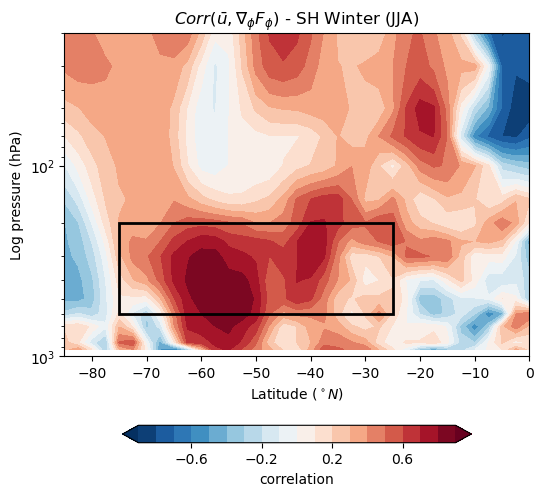

In [108]:
plot.plot_reanalysis_correlation(ds_SH, check_variables=True, top_atmos=20., cut_poles=True, take_seasonal_mean=False,
                                 latitude='SH', label='SH Winter (JJA)')

In [109]:
corr_NH = xr.corr(ds_NH.div1_pr, ds_NH.ubar, dim='time')
corr_NH = corr_NH.sel(latitude=slice(0,85))
corr_NH = corr_NH.sel(pressure=slice(1000.,20.))

corr_SH = xr.corr(ds_SH.div1_pr, ds_SH.ubar, dim='time')
corr_SH = corr_SH.sel(latitude=slice(-85,0))
corr_SH = corr_SH.sel(pressure=slice(1000.,20.)) 

corr_SH = corr_SH.fillna(0)
corr_NH = corr_NH.fillna(0)

In [119]:
# I want 250x150mm box 
inches = 1/25.4 
figsize = (250*inches, 130*inches)
print(figsize)

(9.84251968503937, 5.118110236220472)


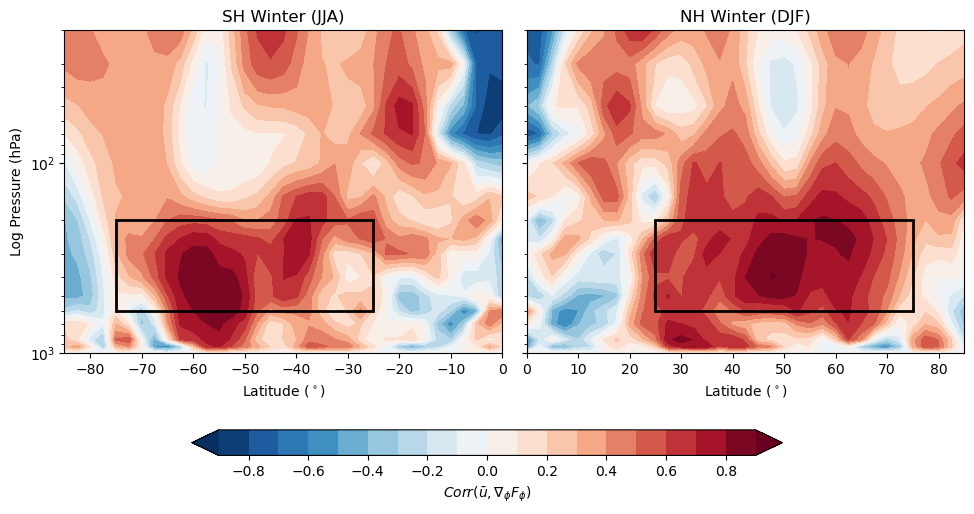

In [122]:
fig, (ax1, ax2) = plt.subplots(figsize=figsize, ncols=2, sharey=True)

# SH Winter (JJA)
color1 = ax1.contourf(corr_SH.latitude.values, corr_SH.pressure.values, corr_SH,
             cmap='RdBu_r', levels=np.linspace(-0.9,0.9,19), extend='both')
ax1.set_yscale('log')
ax1.invert_yaxis() 
ax1.set_xlabel('Latitude ($^\\circ$)')
ax1.set_ylabel('Log Pressure (hPa)')
ax1.set_title('SH Winter (JJA)')
ax1.add_patch(patches.Rectangle((-75., 600.), 50, -400, 
                         fill=False, linewidth=2))

# NH Winter (DJF)
color2 = ax2.contourf(corr_NH.latitude.values, corr_NH.pressure.values, corr_NH,
             cmap='RdBu_r', levels=np.linspace(-0.9,0.9,19), extend='both') 
ax2.set_yscale('log')
ax2.set_xlabel('Latitude ($^\\circ$)')
ax2.set_title('NH Winter (DJF)')
ax2.add_patch(patches.Rectangle((25., 600.), 50, -400, 
                         fill=False, linewidth=2))

plt.tight_layout()

# colourbar
fig.subplots_adjust(bottom=0.3)
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.05])
fig.colorbar(color1, cax=cbar_ax, location='bottom', label='$Corr(\\bar{u}, \\nabla_{\\phi} F_{\\phi})$')

# plt.savefig('./plots/correlation_plot_both-hemis.png')
plt.show()